# Práctica 4 - Simulación de Montecarlo

In [ ]:
from google.colab import files

uploaded = files.upload()

## Ejercicio 1: El tráfico de una web

### Parte 1: Selección de medidas de centralidad

En un negocio e-commerce, una de las primeras métricas que el empresario quiere estudiar es algo tan elemental como el tráfico de su página web. A mayor tráfico, mayores posibilidades de venta y mayor facturación, siempre y cuando se trate de tráfico de calidad (básicamente usuarios interesados en el producto en venta). Controlar una medida de centralidad diaria (media, mediana, moda, etc.) del tráfico es necesario por motivos tanto técnicos (p. ej. cantidad de servidores activos necesarios, tiempo de respuesta de servicios vinculados) como de negocio (alcanzar objetivos de los inversores, conocer los costes de mantenimiento).

La intuición diría que la media de visitas a la web sería una buena medida del tráfico con la que comenzar a hacer análisis y tomar decisiones. Sin embargo, la media está muy sujeta a los efectos de los outliers, e Internet está llena de scrappers, crawlers, usuarios múltiples y demás programas, legales e ilegales, que realizan peticiones a nuestros servidores de manera masiva y que hacen que, en ocasiones, se disparen las cifras de tráfico y no podamos saber cuál es el tráfico "normal" esperado; por lo menos no a través de los métodos clásicos.

El fichero `web_traffic.csv` contiene datos de visitas diarias totales a nuestra web durante un periodo de dos meses. Nuestro objetivo es dar una cifra aproximada de tráfico diario esperado que sea lo suficientemente robusta como para permitirnos tomar decisiones o informar de forma honesta a las partes interesadas.

1. Calcula la media y la mediana del tráfico diario durantes los últimos meses.
2. Representa estas medidas sobre un histograma y razona, de manera heurística, qué medida sería más conveniente para tener una idea real del tráfico diario esperado.




In [ ]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = io.BytesIO(uploaded['web_traffic.csv'])
df = pd.read_csv(path, sep=",")

df

,date,total_visits
0,2019-04-01,9035
1,2019-04-02,10116
2,2019-04-03,8731
3,2019-04-04,7376
4,2019-04-05,7595
...,...,...
56,2019-05-27,12988
57,2019-05-28,8529
58,2019-05-29,7536
59,2019-05-30,8201


In [ ]:
df.total_visits.mean()

9445.672131147541

In [ ]:
df.total_visits.median()

8438.0

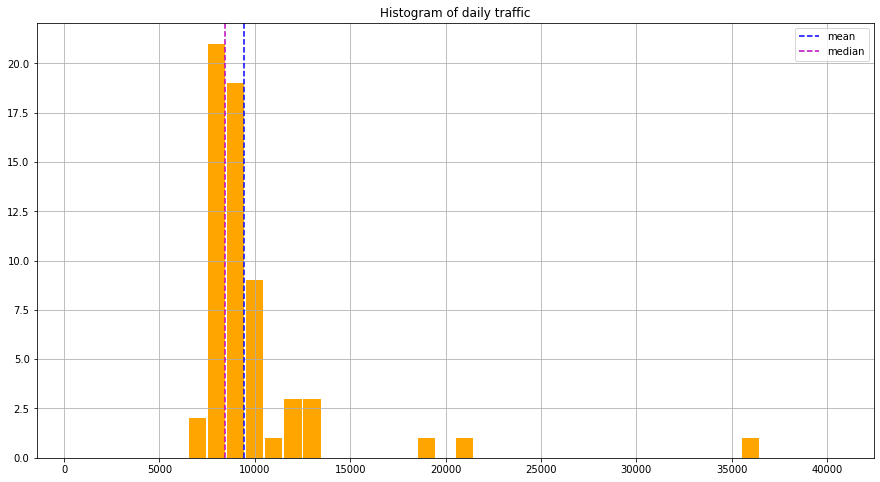

In [ ]:
h, b = np.histogram(df.total_visits, bins=np.linspace(0., 40000., 41))

plt.figure(figsize=(15, 8))

plt.bar(b[1:], h, width=900, color="orange")
plt.axvline(df.total_visits.mean(), linestyle="--", color="b", label="mean")
plt.axvline(df.total_visits.median(), linestyle="--", color="m", label="median")
plt.title("Histogram of daily traffic")
plt.legend(loc="best")
plt.grid()
plt.show()

Una inspección visual indica que la mediana representa mejor el grueso de la masa de las distribución que la media (i.e. la mediana es más cercana a la moda); por lo tanto deberíamos usar la mediana para informar sobre el tráfico diario esperado.

### Parte 2: Verificación de las condiciones del Teorema del Límite Central

Nos gustaría poder aplicar un test de hipótesis para verificar que la medida que hemos esocgido arroja un valor significativo y no es fruto del mero azar. Sin embargo, desconocemos la naturaleza de los datos. Idealmente se trataría de datos normales y, en caso de no serlo, nos gustaría que, por lo menos, se satisfacieran las condiciones del Teorema del Límite Central (TLC).

1. Aplica un test de Shapiro-Wilk a los datos para determinar si existe normalidad.
2. Comprueba que la varianza de la muestra no está acotada y concluye que los datos no satisfacen el TLC.

In [ ]:
from scipy.stats import shapiro

shapiro_test = shapiro(df.total_visits)
shapiro_test

ShapiroResult(statistic=0.47963428497314453, pvalue=2.2466399671617482e-13)

La hipótesis nula de un test de Shapiro-Wilk es que los datos proceden de una distibución normal. Con un p-valor tan bajo, rechazamos y conlcuímos que es muy improbable que estos sean datos procedentes de una distribución normal.

Para comprobar que la varianza no está acotada, lo que haremos es ordenar los valores de tráfic y calcular su varianza paso a paso. Esto es, comenzamos con los dos más pequeños y luego, vamos añadiendo los siguientes de uno en uno, calculando la varianza a cada paso. El objetivo es ver si dicho cálculo converge a un cierto valor o si, por el contrario, crece sin límite aparente.

In [ ]:
df.sort_values("total_visits")

,date,total_visits
43,2019-05-14,6339
24,2019-04-25,6623
53,2019-05-24,7100
3,2019-04-04,7376
6,2019-04-07,7423
...,...,...
29,2019-04-30,12710
56,2019-05-27,12988
30,2019-05-01,18112
55,2019-05-26,20442


In [ ]:
visits = []
variances = [0]
for row in df.sort_values("total_visits").iterrows():

  visits.append(row[1]["total_visits"])

  if len(visits) > 1:
    variances.append(np.var(visits))

In [ ]:
variances

[0,
 20164.0,
 98589.55555555555,
 162866.25,
 181098.16,
 184781.58333333334,
 180449.5510204082,
 177265.9375,
 175598.61728395062,
 176084.2,
 174934.0661157025,
 172302.25,
 168690.28402366868,
 166075.59693877547,
 162810.77333333335,
 160813.4375,
 158459.32179930797,
 155871.38580246913,
 155647.68421052632,
 154724.3,
 154468.31292517012,
 154960.81198347107,
 155956.94517958412,
 157633.984375,
 159942.5376,
 163587.3328402367,
 167242.46913580244,
 171822.3826530612,
 175490.68252080854,
 182522.55999999997,
 193325.26951092607,
 204114.02734375,
 214471.4563820019,
 224331.48183391002,
 235439.27673469388,
 248216.29861111112,
 259286.72899926952,
 271592.25831024925,
 283988.3563445102,
 295368.5475,
 305802.38786436646,
 316395.9710884354,
 334515.78150351543,
 352985.1487603305,
 370570.4395061728,
 388283.4768431002,
 422595.8614757809,
 454429.6870659722,
 486094.9662640567,
 520227.41,
 570041.0134563629,
 626398.7633136094,
 790068.6692773228,
 961768.6930727025,
 117

Para hacernos una mejor idea de la magnitud de los cambios plotaremos también la log-varianza:

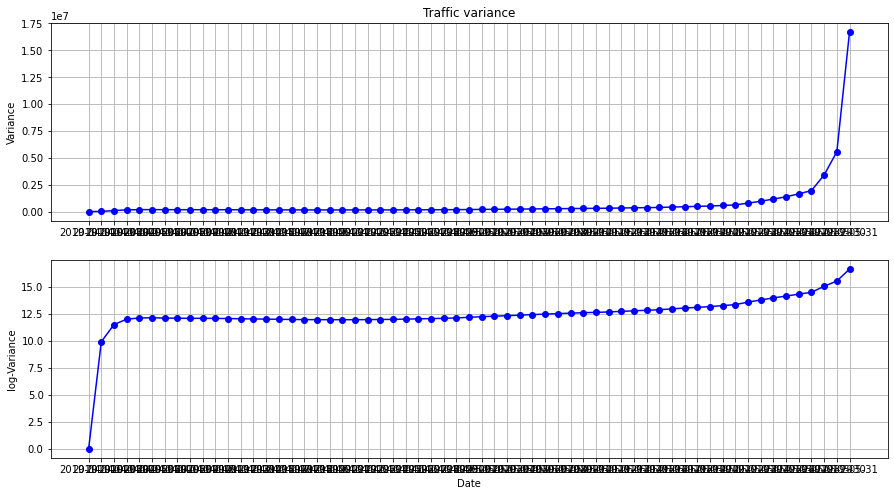

In [ ]:
plt.figure(figsize=(15, 8))

plt.subplot(211)
plt.plot(df.date, variances, "bo-")
plt.grid()
plt.title("Traffic variance")
plt.ylabel("Variance")

plt.subplot(212)
plt.plot(df.date, np.hstack(([0], np.log(variances[1:]))), "bo-")
plt.grid()
plt.xlabel("Date")
plt.ylabel("log-Variance")
plt.show()

Podemos observar cómo la varianza crece exponencialmente según vamos hallando valores más y más grandes de tráfico. Los valores muy grandes son infrecuentes, pero existen, y deben ser tomados en cuenta. Ello nos lleva a, por lo menos, objetar que esta sea una sucesión convergente.


### Parte 3: Intervalos de confianza con Montecarlo

Construye un intervalo de confianza al 99% para la mediana obtenida en los apartados anteriores.

Para obtener un intervalo de confianza necesitamos primero obtener una distribución que arroje los posibles valores de la mediana. Dicha distribución no puede inferirse de manera explícita debido a que, como hemos visto, no se satisfacen las condiciones del TLC. Por lo tanto, sólo podemos tratar de aproximarla con métodos empíricos. 

Para ello,  escribiremos una rutina que nos genera muestras con repetición y a la que le pasamos un parámetro `estimator` que nos calcula un estimador para cada muestra. En esta caso, dicho estimador será la mediana.

In [ ]:
def generate_bootstrap_values(data, estimator, sample_size=None, n_samples=None,
                              random_seed=None, verbose=False, **kwargs):

  if sample_size is None:
    sample_size = 10 * len(data)

  if n_samples is None:
    n_samples = 10 * len(data)

  if random_seed is not None:
    np.random.seed(random_seed)
  bootstrap_values = [estimator(data, **kwargs)]
  for _ in np.arange(n_samples):
    sample = np.random.choice(data, size=sample_size, replace=True)

    if verbose:
      print(sample)

    bs = estimator(sample, **kwargs)
    bootstrap_values.append(bs)

  return bootstrap_values

Esta rutina nos permite simular una colección de medianas posibles obtenidas a partir de hacer distintos remuestreos de los datos y tomando la mediana empírica de cada uno de ellos.

In [ ]:
medians = generate_bootstrap_values(data=df.total_visits,
                                    estimator=np.median,
                                    sample_size=10,
                                    n_samples=4000,
                                    verbose=True)

[8667 9107 8667 9658 8201 7949 8123 7684 7595 7792]
[ 9658  7741  7700  8593  7536  8504 12710 35415  7684  7792]
[ 7949 12037  8150  8529  8783  8063  8023  9658  8667  8832]
[11342  8123  7376  8667  7100  8318  9107  7784  9107  8795]
[ 7466  7792  8318  8770  9035  7466  7874  6623 11937  7875]
[ 7466  7684  8504  8438  8832  7799  7100 12710  8123  8123]
[ 8318  8832  8667  7700  8438  7949 10116  8731  9150  8529]
[ 7874  9084  8593  7949  9150  8593  9959  8204 20442  8123]
[8667 9503 8832 8476 7875 6339 8476 8123 8023 7741]
[ 7949 10116  9658  8123  7684  7663  7799  7684  7983  7663]
[ 9658  7479  9035  8832 18112 12988 12988 12710  7875  8667]
[ 7910  7874  8783 11342 12037 18112 12037  6339  7741  7700]
[9959 8063 7784 7694 9035 8667 8667 8667 9515 8150]
[8201 7466 8832 8063 8123 9515 7663 8204 7536 9658]
[ 7376  9084 35415  7784  7595  8201  9150 20442  7741  9515]
[ 8150  7684  9035 11342  9564  7874  8023  8476  8770  8318]
[ 8731  8023  8832  8204  7799  8731  8204  8318

In [ ]:
medians

[8438.0,
 8162.0,
 8148.0,
 8598.0,
 8492.5,
 7874.5,
 8123.0,
 8598.0,
 8593.0,
 8299.5,
 7874.0,
 9346.5,
 8346.5,
 8667.0,
 8162.0,
 8642.5,
 8397.0,
 8261.0,
 8718.5,
 8945.0,
 9059.5,
 7986.0,
 8571.5,
 10453.0,
 8504.0,
 8354.0,
 7870.5,
 8887.0,
 8201.0,
 8338.5,
 9020.0,
 7998.5,
 7966.0,
 7874.0,
 8492.0,
 8718.5,
 7968.5,
 8731.0,
 8725.0,
 8193.5,
 8075.0,
 9092.5,
 8941.0,
 8598.0,
 7946.5,
 8261.5,
 8177.0,
 8136.5,
 8371.5,
 7966.0,
 8598.0,
 10726.0,
 8769.5,
 8167.0,
 8592.5,
 8584.5,
 8725.0,
 8471.0,
 8397.0,
 7851.0,
 8460.0,
 8308.0,
 8283.5,
 8027.5,
 8423.5,
 8476.0,
 8043.0,
 8630.0,
 8654.0,
 7929.5,
 8136.5,
 8471.0,
 9092.5,
 8243.5,
 8230.5,
 8076.5,
 8175.5,
 7928.5,
 8851.0,
 7949.0,
 8249.5,
 8972.5,
 8123.0,
 8972.5,
 7945.5,
 8313.0,
 8358.0,
 9115.5,
 9391.5,
 8718.5,
 8321.0,
 7966.0,
 9150.0,
 8338.5,
 7983.0,
 8296.0,
 8354.0,
 8175.0,
 8190.5,
 8193.0,
 7966.5,
 8598.0,
 8438.0,
 8207.0,
 7986.0,
 8782.5,
 7837.0,
 8163.5,
 8234.0,
 8502.5,
 8651.0,

Si ploteamos un histograma con las medianas obtenidas podemos intuir el aspecto de la distribución que las genera:

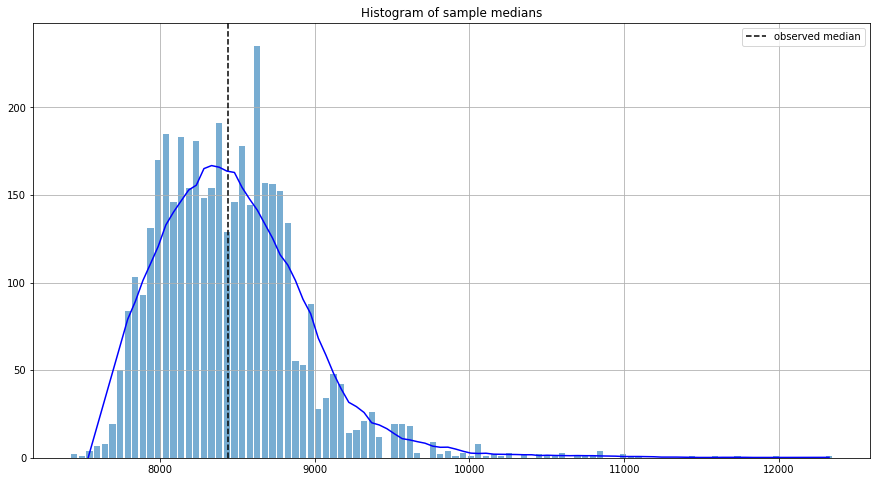

In [ ]:
from scipy.signal import savgol_filter

h, b = np.histogram(medians, bins=100)

plt.figure(figsize=(15, 8))

plt.bar(b[1:], h, width=40, alpha=0.6)
plt.axvline(df.total_visits.median(), linestyle="--", color="k",
            label="observed median")
plt.plot(b[1:], savgol_filter(h, 15, 1), 'b-')
plt.title("Histogram of sample medians")
plt.ylim(bottom=0)
plt.legend(loc="best")
plt.grid()
plt.show()

La curiosidad nos puede llevar a preguntarnos si esta distribución de medianas muestrales es normal. Lo averiguamos con un test de Shapiro-Wilk:

In [ ]:
shapiro_test = shapiro(medians)
shapiro_test

ShapiroResult(statistic=0.9175513386726379, pvalue=2.8852735380447983e-42)

No lo es. De hecho, no tenemos manera de saber de qué distribución se trata exactamente.

Si queremos un intervalo del 99% significa que, de la distribución simulada, hemos de buscar los cortes que hacen que, entre ellos, quede el 99% de la masa de la distribución. Es decir, los puntos $a$ y $b$ tales que
$$\int_a^b f_X(t)dt = 0.99,$$
Dónde $f_X(t)$ es la función de densidad de la distribución simulada en los apartdos anteriores.

Como sabemos, esto es equivalente a calcular $a$ tal que la integral a la izquierda es $(1. - 0.99) / 2 = 0.005$ y $b$ tal que la integral a la derecha es también $0.005$. Veámoslo:

In [ ]:
dist_values = b[1:]
dist_mass = np.cumsum(h / np.sum(h))

left_bound = np.max(dist_values[dist_mass <= 0.005])
right_bound = np.min(dist_values[dist_mass >= 0.995]) # Que a la derecha valga 0.005 es lo que mismo que que valga 0.995 a la izquierda.

In [ ]:
print(f"[{left_bound}, {right_bound}]")

[7596.46, 10501.62]


La mediana nos había dado 8438. El IC simulado nos dice que la mediana poblacional se encuentra, con un 99% de probabilidad, entre 7657 y 10102. Observemos que este es un intervalo de confianza para la mediana, para el cual, a priori, no hay un método canónico; menos cuando se trata de la mediana de una distribución no-normal.

## Ejercicio 2: Peticiones al servidor

El fichero `server_requests.csv` contiene una muestra de las peticiones que se realizan al servidor de la web del ejercicio anterior, estratificada según si las peticiones se realizan en día laborable o en fin de semana. El objetivo de este ejercicio es comprobar que la frecuencia media con la que se realizan peticiones no es la misma según el día, de manera que el administrador de sistemas pueda gestionar mejor los recursos del servidor.



### Parte 1: Normalidad de los datos

Comprueba que el tiempo entre peticiones, tanto en conjunto como para laborables y fines de semana por separado, no sigue una distribución normal.

In [ ]:
path = io.BytesIO(uploaded['server_requests.csv'])
df = pd.read_csv(path, sep=",")

df

,day_type,visit_time,seconds_since_last
0,workday,08:39:14.377887586,2.672232
1,workday,08:54:31.477411197,917.099524
2,workday,09:02:27.605910338,476.128499
3,workday,09:04:50.270850152,142.664940
4,workday,09:05:03.617868628,13.347018
...,...,...,...
16400,weekend,23:51:54.328670759,172.986097
16401,weekend,23:52:05.915897770,11.587227
16402,weekend,23:54:36.264411809,150.348514
16403,weekend,23:55:05.136462147,28.872050


Miramos si se trata de distribuciones normales con el test de Shapiro-Wilk

In [ ]:
shapiro_test = shapiro(df.seconds_since_last)
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.12040901184082031, pvalue=0.0)

El motor de `scipy` nos advierte de que el p-valor podría no ser correcto con una muestra tan grande. Usaremos, pues, un test de Kolmogorov-Smirnov para asegurarnos.

In [ ]:
from scipy.stats import kstest

kolmogorov_test = kstest(rvs=df.seconds_since_last, cdf="norm", N=8000)
kolmogorov_test

KstestResult(statistic=0.6671028223020622, pvalue=0.0)

In [ ]:
kolmogorov_test = kstest(rvs=df[df.day_type=="workday"].seconds_since_last, cdf="norm", N=8000)
kolmogorov_test

KstestResult(statistic=0.6317742037810153, pvalue=0.0)

In [ ]:
kolmogorov_test = kstest(rvs=df[df.day_type=="weekend"].seconds_since_last, cdf="norm", N=8000)
kolmogorov_test

KstestResult(statistic=0.7043950978684087, pvalue=0.0)

En efecto, no se trata de distribuciones normales. Hagamos un plot para ver qué aspecto tienen:

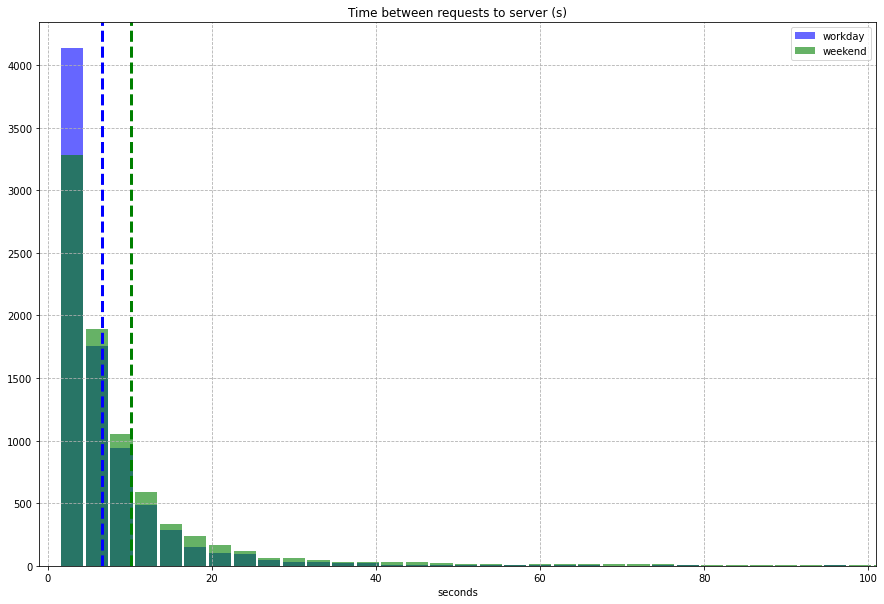

In [ ]:
plt.figure(figsize=(15, 10))

h, b = np.histogram(df[df.day_type=="workday"].seconds_since_last, bins=np.linspace(0., 2400, 801))
plt.bar(b[1:], h, width=2.7, alpha=0.6, label="workday", color="b")
plt.axvline(df[df.day_type=="workday"].seconds_since_last.mean(), linestyle="--", color="b", linewidth=3)

h, b = np.histogram(df[df.day_type=="weekend"].seconds_since_last, bins=np.linspace(0., 2400, 801))
plt.bar(b[1:], h, width=2.7, alpha=0.6, label="weekend", color="g")
plt.axvline(df[df.day_type=="weekend"].seconds_since_last.mean(), linestyle="--", color="g", linewidth=3)

plt.xlim([-1, 101])
plt.title("Time between requests to server (s)")
plt.grid(linestyle="--")
plt.xlabel("seconds")
plt.legend()
plt.show()

Los histogramas tienen aspecto aproximadamente exponencial, pero podrían ser distribuciones Gamma, Beta o combinaciones de los tres tipos.

### Parte 2: Aproximación del p-valor

Define un test de hipótesis para averiguar si el tiempo medio entre peticiones es distinto para días laborables y días festivos.

El test que nos gustaría hacer el siguiente: llamemos $X$ e $Y$ a las distirbuciones que generan los tiempos entre peticiones de laborables y festivos, respectivamente, entonces, el test deseado es
$$H_0: \mu_{X} - \mu_{Y}=0, \\ 
H_1: \mu_{X} - \mu_{Y} \neq 0.$$

Como no se trata de datos normales, no deberíamos usar un t-test. Usaremos, pues,  un test de permutaciones para rechazar la hipótesis nula con un nivel de significación $\alpha = 0.05$. Lo que hará este test es comparar la diferencia observada contra una distribución empírica de las diferencias que se obtendrían permutando aleatoriamente las observaciones entre las dos muestras. Si la diferencia que observamos es producto del azar y no se debe a la presencia de un efecto, entonces debería ocupar un valor central en dicha distribución.

Lo primero que necesitamos, pues, es escribir una rutina que nos genere la distribución de diferencias en media a partir de generar distintas permutaciones de las dos muestras.

In [ ]:
def generate_permutation_samples(x, y, estimator, n_iter=None, two_sided=True,
                                 random_seed=None, verbose=False, **kwargs):
 
  if n_iter is None:
    n_iter = (len(x) + len(y)) * 10

  if random_seed is not None:
    np.random.seed(random_seed)

  conc_sample = list(x) + list(y)

  batch_1 = len(x)
  batch_2 = len(x) + len(y)
  
  samples = [estimator(x, **kwargs) - estimator(y, **kwargs)]
  for _ in np.arange(n_iter):
    perm_sample = np.random.choice(conc_sample, size=len(conc_sample))

    if verbose:
      print(perm_sample)
    
    this_sample = estimator(
        perm_sample[:batch_1], **kwargs) - estimator(
            perm_sample[batch_1:batch_2], **kwargs)
    samples.append(this_sample)

  if two_sided:
    samples = [np.abs(s) for s in samples]
  
  return samples

In [ ]:
def get_pvalue(test, data, alpha=0.05):
  
  bootstrap_values = np.array(data)
  p_value = len(bootstrap_values[bootstrap_values < test]) / len(bootstrap_values)

  p_value = np.min([p_value, 1. - p_value])

  return [p_value, p_value < alpha] 

Llamamos ahora ambas rutinas para testear que la diferencia es cero con un probabilidad del 95%:

In [ ]:
data = generate_permutation_samples(x=df[df.day_type=="workday"].seconds_since_last,
                                    y=df[df.day_type=="weekend"].seconds_since_last,
                                    estimator=np.mean,
                                    n_iter=4000)

test_val = np.abs(df[df.day_type=="workday"].seconds_since_last.mean() - df[df.day_type=="weekend"].seconds_since_last.mean())

pval = get_pvalue(test=test_val, data=data)

In [ ]:
pval

[0.00024993751562107924, True]

El p-valor da (aproximadamente) cero. Ploteemos las diferencias generadas para ver dónde se sitúa la diferencia observada en los datos para entender este p-valor tan bajo:

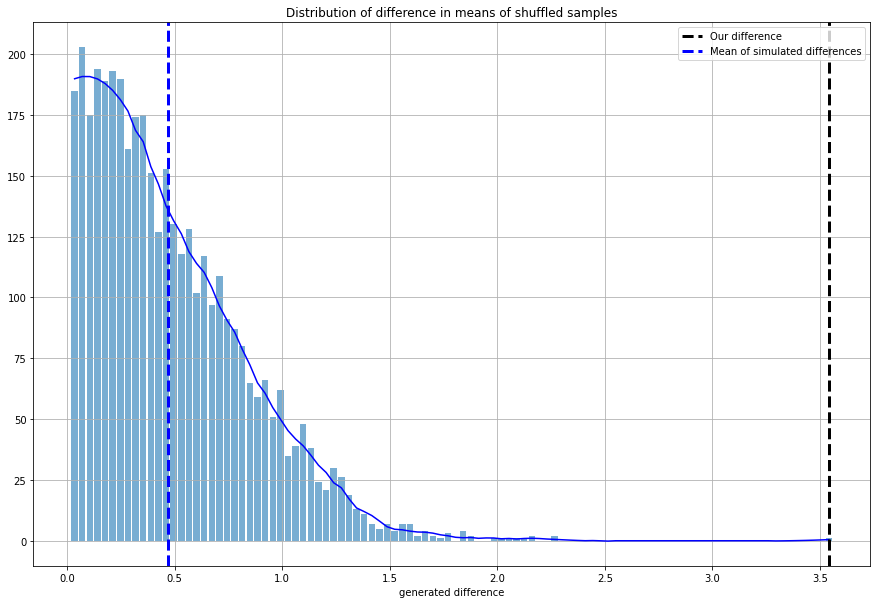

In [ ]:
plt.figure(figsize=(15, 10))

h, b = np.histogram(data, bins=100)
plt.bar(b[1:], h, width=0.03, alpha=0.6)
plt.plot(b[1:], savgol_filter(h, 15, 2), 'b-')
plt.axvline(test_val, linestyle="--", color="k", linewidth=3, label="Our difference")
plt.axvline(np.mean(data), linestyle="--", color="b", linewidth=3, label="Mean of simulated differences")
plt.title("Distribution of difference in means of shuffled samples")
plt.xlabel("generated difference")
plt.legend(loc=1)
plt.grid()
plt.show()

Es decir, si generamos permutaciones de las dos muestras de tiempo entre peiticiones, obtenemos unas diferencias centradas en cero, que es lo que uno esperaría de una colección aleatoria de datos. Si nuestra observación fuese también aleatoria, debería encontrarse en la zona de mayor masa de la distribución de diferencias generada.

## Problema: Simulación a cholón

### Parte 1: La potencia de un test

En este ejercicio vamos a calcular la potencia de un test de hipótesis. Definimos la potencia del test $T$ como la probabilidad de obtener un resultado positivo (p.ej. un p-valor < 0.05) cuando verdaderamente hay efecto. Esto es, si $T$ contrasta la hipótesis nula $H_0$ contra la alternativa $H_1$ con un nivel de significación $\alpha$, la **potencia de $T$** es:
$$\mathrm{pow}(T):=P \left (p_T < \alpha | H_1 \mathrm{is\ true} \right )$$
Dicho de otro modo, nos mide la tasa de verdaderos positivos (y, por ende, la tasa de falsos positivos, que es la que se suele reportar más a menudo). Incluso cuando los datos subyacentes son normales, no hay una manera directa de obtener la potencia de un test, tal y como sí ocurre con la distribución del estadístico de contraste; así que no queda más remedio que aproximarla con un algoritmo de simulación.

Supón que quieres comparar la tasa de conversión (CR) de dos productos similares en una web de e-commerce. Tras realizar un test AB, se obtiene que la CR de A es 0.031 y la CR de B es 0.054. Si las conversiones siguen sendas distribuciones binomiales y hemos tenido 4568 y 5021 usuarios únicos viendo cada producto, calcula la potencia del test que compara las dos proporciones si rechazamos la hipótesis nula con un p-valor de 0.05.

*Indicación*: repite el test muchas veces, cada una simulando las dos binomiales aleatoriamente, y anota cuántas veces obtienes el p-valor deseado o mejor. Prueba con distinto número de iteraciones y comenta los resultados. Aquí tienes un snippet de código para generar muestras binomiales de probabilidad `p` y tamaño `k` a partir de repetir una Bernoulli.


---
Problem: Cholon simulation
Part 1: The power of a test
In this exercise we are going to calculate the power of a hypothesis test. We define the power of the 𝑇 test as the probability of obtaining a positive result (eg a p-value < 0.05) when there is indeed an effect. That is, if 𝑇 tests the null hypothesis 𝐻0 against the alternative 𝐻1 at significance level 𝛼 , the power of 𝑇 is:
pow(𝑇):=𝑃(𝑝𝑇<𝛼|𝐻1is true)
In other words, it measures the rate of true positives (and, therefore, the rate of false positives, which is the most frequently reported). Even when the underlying data is normal, there is no direct way to obtain the power of a test, as there is with the distribution of the test statistic; so there is no choice but to approximate it with a simulation algorithm.

Suppose you want to compare the conversion rate (CR) of two similar products on an e-commerce website. After performing an AB test, it is obtained that the CR of A is 0.031 and the CR of B is 0.054. If the conversions follow binomial distributions and we have had 4568 and 5021 unique users viewing each product, calculate the power of the test that compares the two proportions if we reject the null hypothesis with a p-value of 0.05.

Hint: Repeat the test many times, each simulating the two binomials at random, and note how many times you get the desired p-value or better. Try different numbers of iterations and comment on the results. Here is a snippet of code to generate binomial samples of probability p and size k from repeating a Bernoulli.

In [ ]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import bernoulli

# Modifica los valores y observa los resultados que obtienes en distintas pruebas

CR_A = 0.031 # Tasa de conversión para el producto A
CR_B = 0.054 # Tasa de conversión para el producto B
n_A = 4568 # Tamaño de la muestra para el producto A
n_B = 5021 # Tamaño de la muestra para el producto B

binom_sampleA = bernoulli.rvs(CR_A, size=n_A)
binom_sampleB = bernoulli.rvs(CR_B, size=n_B)
print(binom_sampleA)
print(binom_sampleB)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:

def generate_permutation_samples(x, y, estimator, n_iter=None, two_sided=True,
                                 random_seed=None, verbose=False, **kwargs):
#La función genera muestras de permutación mezclando los datos entre los dos grupos y luego aplicando la función de estimador a los datos mezclados.
#Los resultados se almacenan en una lista y la función los devuelve.


  if n_iter is None:
    n_iter = (len(x) + len(y)) * 10

  if random_seed is not None:
    np.random.seed(random_seed)
#Esta parte del código establece el número de iteraciones y la semilla aleatoria para la prueba de permutación

  conc_sample = list(x) + list(y)
#se utiliza para barajar los datos entre los dos grupos


  batch_1 = len(x)
  batch_2 = len(x) + len(y)
  
  samples = [estimator(x, **kwargs) - estimator(y, **kwargs)]

  #starting a loop 
  for _ in np.arange(n_iter):
    perm_sample = np.random.choice(conc_sample, size=len(conc_sample))

    if verbose:
      print(perm_sample)
    
    this_sample = estimator(
        perm_sample[:batch_1], **kwargs) - estimator(
            perm_sample[batch_1:batch_2], **kwargs)
    samples.append(this_sample)

  if two_sided:
    samples = [np.abs(s) for s in samples]
  
  return samples

Este proceso se repite n_iter veces, lo que da como resultado una lista de n_iter + 1 muestras de permutación, incluida la muestra original obtenida a partir de los datos originales. Estas muestras se pueden usar para calcular el valor p de la prueba.

In [ ]:
def get_pvalue(test, data, alpha=0.05):
  
  bootstrap_values = np.array(data)
  p_value = len(bootstrap_values[bootstrap_values < test]) / len(bootstrap_values)

  p_value = np.min([p_value, 1. - p_value])

  return [p_value, p_value < alpha] 

La función devuelve una lista que contiene el valor p calculado y un valor boolean que indica si la estadística de prueba es significativa (es decir, si el valor p es menor que el nivel de significación especificado). Este valor p representa la probabilidad de obtener el estadístico de prueba observado o uno más extremo bajo la hipótesis nula.

In [ ]:
pvalores=[]
count = 0
total_its = 1000

for i in range(total_its):

  binom_sampleA = bernoulli.rvs(CR_A, size=n_A)
  binom_sampleB = bernoulli.rvs(CR_B, size=n_B)
  muestras=generate_permutation_samples(binom_sampleA,
                                        binom_sampleB,
                                        estimator=np.mean,
                                        n_iter=1000)
  pvalor, _ = get_pvalue(0.023, muestras, alpha=0.05) #0.023 = CR_B - CR_A
  pvalores.append(pvalor)

  if pvalor <= 1.e-10:
    count += 1
#puedes cambiar el número de iteraciones, la estadística de prueba y el nivel de significación para ver cómo cambia la potencia

count / total_its

0.492

La potencia es la probabilidad de rechazar la hipótesis nula cuando es falsa. Esto significa que si la hipótesis nula es falsa (es decir, hay una diferencia real en las medias entre las dos muestras binomiales), la prueba rechazará la hipótesis nula aproximadamente el 49.2 % de las veces.

### Parte 2: ¿Cuántos usuarios necesito para estar seguro de los resultados?

El tema de la potencia lleva al razonamiento siguiente: dado que un test podría no ser suficientemente potente, ello implica que es relativamente frecuente obtener p-valores bajos cuando en realidad no hay efecto. Esto debería suceder, sobre todo, cuando las tasas de conversión son bajas y disponemos de pocas muestras. En tal caso, ¿cuantos usuarios se necesitan para que los resultados del test sean fiables?

Esta no es una cuestión baladí, y la realidad es que a menudo es muy complicado reportar resultados de un test AB porque, o bien se desconoce el tamaño muestral necesario para hacerlo fiable, o bien dicho tamaño es tan grande que es imposible de alcanzar.

La norma no escrita en la industria es que, para reportar resultados de un test AB, se necesita un p-valor de 0.05 o inferior y que el test tenga una potencia de, al menos, 0.8 (80%). Fijadas estas dos cantidades, simula tests de proporciones con los datos de la parte 1. Comienza con pocas muestras por grupo (por ejemplo, 100 en cada variante) y ves aumentando los tamaños muestrales hasta que obtengas una N que dé un p-valor de 0.05 o menos y una potencia de 0.8 o más. **¿Qué tamaño muestral se necesita?**

*Indicación*: A cada iteración de tamaño muestral necesitas simular los p-valores para saber la potencia; por lo tanto tendrás que hacer un loop de loops. Dependiendo de la CPU y la RAM de tu máquina esto puede ser bastante lento. Ten paciencia, deja la máquina varias horas calculando si es necesario. Tal cosa es habitual en entornos de trabajo y experimentación en Data Science.

In [ ]:
import numpy as np
from scipy.stats import bernoulli

n_its = 100 #sample size
max_its = 5000 
pow = 0.9 #mas de 0.8
total_its = 100
min_pval = 0.05

ratio = 0.
pvalores = []

# bucle para salir cuando la proporción de pruebas exitosas es mayor o igual a la potencia deseada (pow) 
#o el número de iteraciones excede el número máximo de iteraciones (max_its)
while ratio < pow or n_its > max_its:
    count = 0
    for i in range(total_its):
        binom_sampleA = bernoulli.rvs(CR_A, size=n_its)
        binom_sampleB = bernoulli.rvs(CR_B, size=n_its)
        muestras = generate_permutation_samples(binom_sampleA, binom_sampleB, estimator=np.mean, n_iter=1000)
        pvalor, _ = get_pvalue(0.023, muestras, alpha=min_pval)
        pvalores.append(pvalor)

        if pvalor <= min_pval:
            count += 1

    ratio = count / total_its
    n_its += 100

# final sample size
print(n_its - 100)

700


Este código simula pruebas de proporciones utilizando los datos de la parte 1. Comienza con un tamaño de muestra de 100 para cada variante y aumenta el tamaño de muestra en 100 en cada iteración. Continuará iterando hasta que se alcance el nivel de potencia deseado de 0,8 o más y el valor p sea menor o igual a 0,05. 

Se necesita un tamaño de muestra de 700 para lograr un valor p de 0.05 o menos y una potencia de 0.8 o más para la prueba de proporciones utilizando los datos de la parte 1. Esto significa que para informar con precisión los resultados de una prueba AB , debe tener al menos 700 observaciones en cada variante.